In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%config InlineBackend.figure_format='retina'

In [9]:
loan_df = pd.read_csv('data/loans.csv')
loan_df = loan_df[loan_df['amount_funded_by_investors'] > 0]


In [10]:
loan_df.head(10)

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
0,8.90,735-739,20000.0,20000.0,36.0
1,12.12,715-719,19200.0,19200.0,36.0
2,21.98,690-694,35000.0,35000.0,60.0
3,9.99,695-699,10000.0,9975.0,36.0
4,11.71,695-699,12000.0,12000.0,36.0
5,15.31,670-674,6000.0,6000.0,36.0
6,7.90,720-724,10000.0,10000.0,36.0
7,17.14,705-709,33500.0,33450.0,60.0
8,14.33,685-689,14675.0,14675.0,36.0
9,6.91,715-719,7000.0,7000.0,36.0


In [11]:
loan_df.describe()

,interest_rate,amount_requested,amount_funded_by_investors,loan_length
count,2492.000000,2492.000000,2492.000000,2492.000000
mean,13.075056,12430.959069,12038.195470,41.277689
std,4.180431,7801.437839,7730.217181,9.942344
min,5.420000,1000.000000,200.000000,36.000000
25%,10.160000,6000.000000,6000.000000,36.000000
50%,13.110000,10000.000000,10000.000000,36.000000
75%,15.800000,17000.000000,16000.000000,36.000000
max,24.890000,35000.000000,35000.000000,60.000000


In [12]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2492 non-null   float64
 1   fico_range                  2492 non-null   object 
 2   amount_requested            2492 non-null   float64
 3   amount_funded_by_investors  2492 non-null   float64
 4   loan_length                 2492 non-null   float64
dtypes: float64(4), object(1)
memory usage: 116.8+ KB


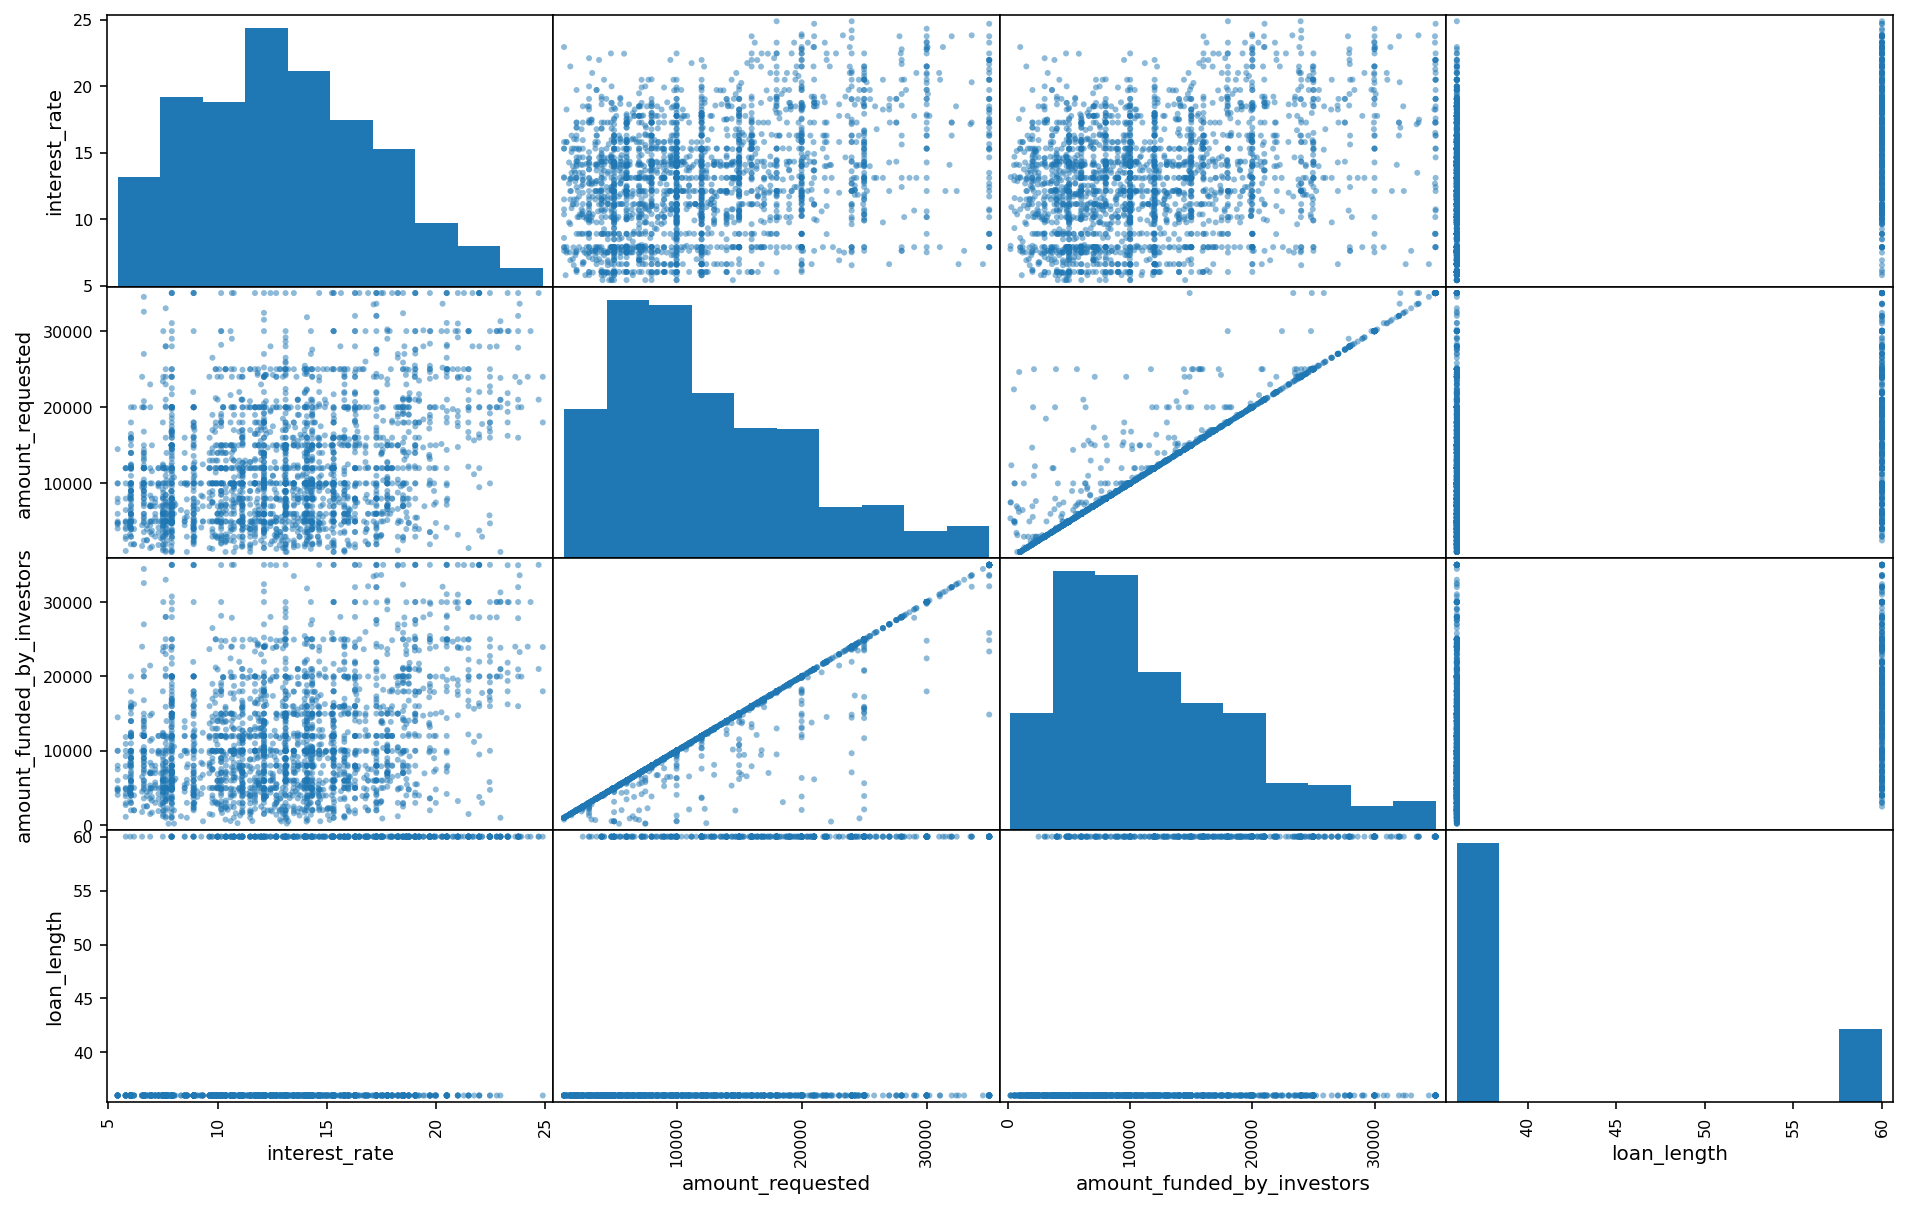

In [13]:
pd.plotting.scatter_matrix(loan_df,figsize=(16,10));

In [14]:
loan_df['fico_ordinal'] = loan_df['fico_range'].apply(lambda x: x.split('-')[0])


In [15]:
loan_df['fico_ordinal']=loan_df['fico_ordinal'].astype(int)


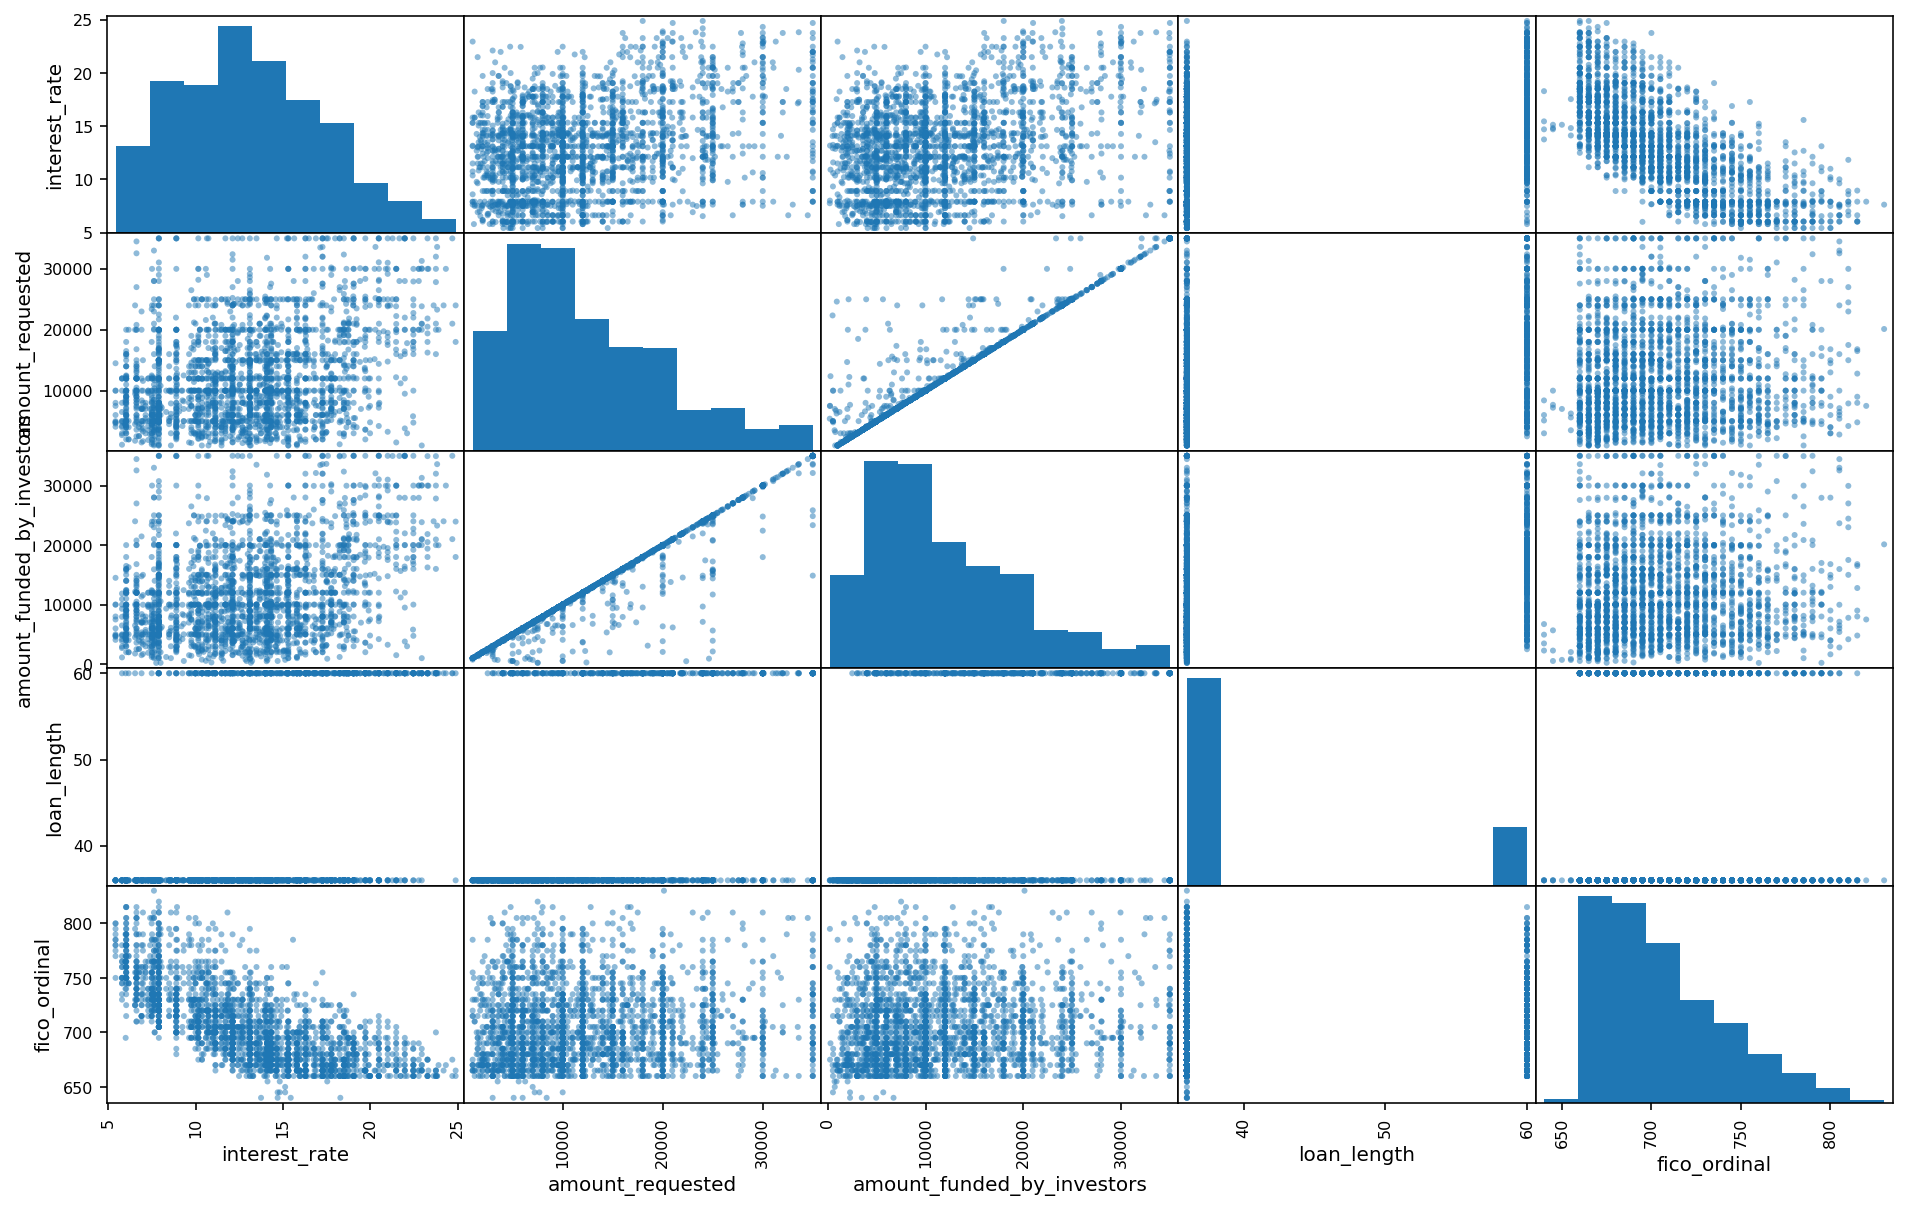

In [16]:
pd.plotting.scatter_matrix(loan_df,figsize=(16,10));

<AxesSubplot:>

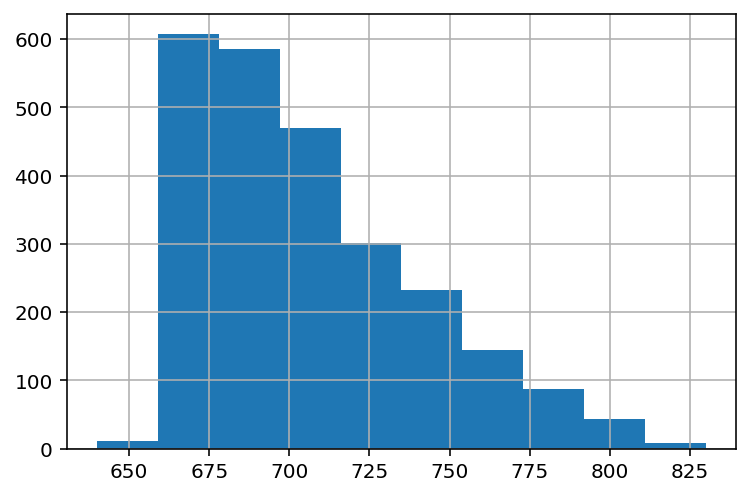

In [17]:
loan_df['fico_ordinal'].hist()

In [18]:
def credit_rating():
    if loan_df['fico_ordinal'] >= 580 & loan_df['fico_ordinal'] <= 669:
        rating = 'Fair'
    elif loan_df['fico_ordinal'] >= 670 & loan_df['fico_ordinal'] <= 739:
        rating = 'Good'    
    elif loan_df['fico_ordinal'] >= 740 & loan_df['fico_ordinal'] <= 799:
        rating = 'Very Good'
    elif loan_df['fico_ordinal'] >= 800 & loan_df['fico_ordinal'] <= 850:
        rating = 'Exceptional'
    return rating
    

In [19]:
def classify_credit(score):
    if score <= 669:
        return "Fair"
    elif score <=739:
        return "Good"
    elif score <= 799:
        return "Very Good"
    elif score <= 850:
        return "Exceptional"


In [20]:
loan_df['fico_group'] = loan_df['fico_ordinal'].apply(lambda x: classify_credit(x))


In [21]:
loan_df.fico_group.value_counts()

Good           1758
Very Good       414
Fair            281
Exceptional      39
Name: fico_group, dtype: int64

In [22]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 0 to 2497
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2492 non-null   float64
 1   fico_range                  2492 non-null   object 
 2   amount_requested            2492 non-null   float64
 3   amount_funded_by_investors  2492 non-null   float64
 4   loan_length                 2492 non-null   float64
 5   fico_ordinal                2492 non-null   int64  
 6   fico_group                  2492 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 155.8+ KB


In [23]:
loan_df.head()

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length,fico_ordinal,fico_group
0,8.90,735-739,20000.0,20000.0,36.0,735,Good
1,12.12,715-719,19200.0,19200.0,36.0,715,Good
2,21.98,690-694,35000.0,35000.0,60.0,690,Good
3,9.99,695-699,10000.0,9975.0,36.0,695,Good
4,11.71,695-699,12000.0,12000.0,36.0,695,Good


In [24]:
loan_df.loan_length.value_counts()

36.0    1944
60.0     548
Name: loan_length, dtype: int64

In [25]:
loan_df.describe()

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_ordinal
count,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000
mean,13.075056,12430.959069,12038.195470,41.277689,705.878812
std,4.180431,7801.437839,7730.217181,9.942344,34.947488
min,5.420000,1000.000000,200.000000,36.000000,640.000000
25%,10.160000,6000.000000,6000.000000,36.000000,680.000000
50%,13.110000,10000.000000,10000.000000,36.000000,700.000000
75%,15.800000,17000.000000,16000.000000,36.000000,725.000000
max,24.890000,35000.000000,35000.000000,60.000000,830.000000


In [26]:
X = loan_df[['amount_requested', 'amount_funded_by_investors','loan_length','fico_ordinal']]
y= loan_df['interest_rate']
model = sm.OLS(y,sm.add_constant(X)).fit()


/home/richy/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     1833.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:06:12   Log-Likelihood:                -5388.9
No. Observations:                2492   AIC:                         1.079e+04
Df Residuals:                    2487   BIC:                         1.082e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [28]:
X = loan_df[['amount_funded_by_investors','loan_length','fico_ordinal']]
y= loan_df['interest_rate']
model2 = sm.OLS(y,sm.add_constant(X)).fit()


/home/richy/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     2433.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:06:12   Log-Likelihood:                -5393.7
No. Observations:                2492   AIC:                         1.080e+04
Df Residuals:                    2488   BIC:                         1.082e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [30]:
for i,col in enumerate(X.drop('fico_ordinal',axis= 1)):
    print(f'{col}: {variance_inflation_factor(X.values , i)}')
   

amount_funded_by_investors: 4.097317770370179
loan_length: 20.923829570748918


In [31]:
pd.get_dummies(loan_df['fico_group'])
loan_df_dummies = pd.concat([loan_df, pd.get_dummies(loan_df['fico_group'])], axis=1)
pd.get_dummies(loan_df['loan_length'])
loan_df_dummies = pd.concat([loan_df_dummies, pd.get_dummies(loan_df_dummies['loan_length'])], axis=1)


In [32]:
loan_df_dummies

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length,fico_ordinal,fico_group,Exceptional,Fair,Good,Very Good,36.0,60.0
0,8.90,735-739,20000.0,20000.00,36.0,735,Good,0,0,1,0,1,0
1,12.12,715-719,19200.0,19200.00,36.0,715,Good,0,0,1,0,1,0
2,21.98,690-694,35000.0,35000.00,60.0,690,Good,0,0,1,0,0,1
3,9.99,695-699,10000.0,9975.00,36.0,695,Good,0,0,1,0,1,0
4,11.71,695-699,12000.0,12000.00,36.0,695,Good,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,16.77,705-709,30000.0,29950.00,60.0,705,Good,0,0,1,0,0,1
2494,14.09,740-744,16000.0,16000.00,60.0,740,Very Good,0,0,0,1,0,1
2495,13.99,680-684,10000.0,10000.00,36.0,680,Good,0,0,1,0,1,0
2496,12.42,675-679,6000.0,6000.00,36.0,675,Good,0,0,1,0,1,0


In [33]:
X = loan_df_dummies[['amount_requested','Exceptional','Fair', 'Very Good', 60.0]]
y= loan_df_dummies['interest_rate']
model3 = sm.OLS(y,sm.add_constant(X)).fit()


/home/richy/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [34]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     717.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:06:12   Log-Likelihood:                -5987.3
No. Observations:                2492   AIC:                         1.199e+04
Df Residuals:                    2486   BIC:                         1.202e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.1911      0.108  

In [35]:
for i,col in enumerate(X):
    print(f'{col}: {variance_inflation_factor(X.values , i)}')
   

amount_requested: 1.804555689396974
Exceptional: 1.019327038450151
Fair: 1.0799103588748051
Very Good: 1.1594623106746327
60.0: 1.5377318541871527
